## 수_인소과_20231586_김범준
### 2025년 4월 9일
### bow

In [ ]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy,
# 시각화를 위한 seaborn, matplotlib을 임포트한다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.4 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

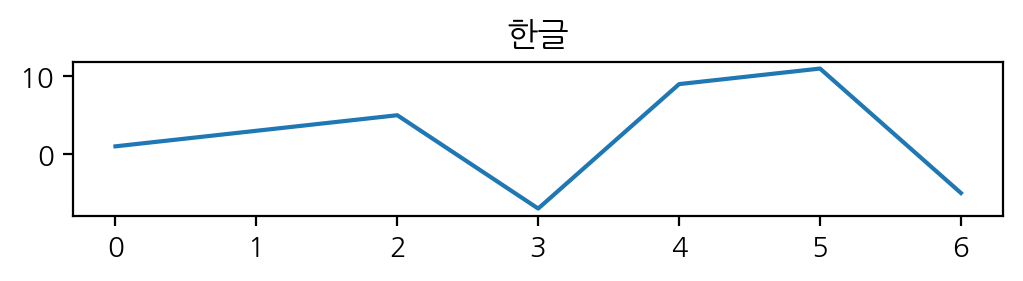

In [ ]:
# 한글 폰트 설정
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1, 3, 5, -7, 9, 11, -5]).plot(title="한글", figsize=(6, 1))

In [ ]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "택시 승강장 문의입니다."]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>

In [ ]:
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 7)	2
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	2
  (2, 1)	1
  (2, 3)	1
  (2, 6)	1
  (3, 1)	1
  (3, 3)	1
  (3, 8)	1


In [ ]:
dtm = cvect.fit_transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>

In [ ]:
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (4, 9)>
  Coords	Values
  (0, 7)	2
  (0, 0)	1
  (0, 2)	1
  (0, 1)	1
  (1, 1)	1
  (1, 6)	2
  (1, 5)	1
  (1, 4)	1
  (2, 1)	1
  (2, 6)	1
  (2, 3)	1
  (3, 1)	1
  (3, 3)	1
  (3, 8)	1


In [ ]:
# 단어 사전을 홱인해 보면 {H단어,‘: 인덱스 번하로 되어 있음을 알 수 있다.
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

In [ ]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나',
       '택시'], dtype=object)

In [ ]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [ ]:
# t는 가로로 길게 보이기 위해 추가한 것으로
# 행과 열의 위치를 바꾸는 전치행렬 기능이다.
df_dtm.sum().to_frame().T

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


In [ ]:
# ngram_range： 추출할 다른 단어 n-gram 또는 char n-gram에 대한
# n-값 범위의 하한 및 상한이다. 기본값은 (1, 1)
# ngram_range = (1, 2)
cvect = CountVectorizer(ram_range=(1, 2))
dtm = cvect.fit_transform(corpus)

TypeError: CountVectorizer.__init__() got an unexpected keyword argument 'ram_range'

In [ ]:
# ngram_range： 추출할 다른 단어 n-gram 또는 char n-gram에 대한
# n-값 범위의 하한 및 상한이다. 기본값은 (1, 1)
# ngram_range = (1, 2)
cvect = CountVectorizer(ngram_range=(1, 2)) # Changed 'ram_range' to 'ngram_range'
dtm = cvect.fit_transform(corpus)

In [ ]:
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 26 stored elements and shape (4, 20)>
  Coords	Values
  (0, 15)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (0, 16)	1
  (0, 1)	1
  (0, 17)	1
  (0, 4)	1
  (1, 2)	1
  (1, 11)	2
  (1, 9)	1
  (1, 7)	1
  (1, 14)	1
  (1, 10)	1
  (1, 13)	1
  (1, 8)	1
  (2, 2)	1
  (2, 11)	1
  (2, 5)	1
  (2, 12)	1
  (2, 6)	1
  (3, 2)	1
  (3, 5)	1
  (3, 6)	1
  (3, 18)	1
  (3, 19)	1


In [ ]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0
1,0,0,1,0,0,0,0,1,1,1,1,2,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df_dtm.sum().to_frame().T

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,4,1,1,2,2,1,1,1,1,3,1,1,1,2,1,1,1,1


In [ ]:
# max_features： 개수만큼의 단어만 추출
cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1, max_features=10)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,상생지원금,상생지원금 문의입니다,요금,요금 문의입니다,운행시간과 지하철,운행시간과 지하철 요금,코로나
0,1,1,1,1,1,0,0,0,0,2
1,0,0,0,0,0,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0


In [ ]:
# max_features： 개수만큼의 단어만 추출
cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1, max_features=11)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,상생지원금,상생지원금 문의입니다,요금,요금 문의입니다,운행시간과 지하철,운행시간과 지하철 요금,지하철 승강장,코로나
0,1,1,1,1,1,0,0,0,0,0,2
1,0,0,0,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
stop_words=["코로나", "문의입니다" ]

# max_features： 개수만큼의 단어만 추출
cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1.0, max_features=20, stop_words=stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
stop_words=["코로나", "문의입니다" ]

# max_features： 개수만큼의 단어만 추출
cvect = CountVectorizer(ngram_range=(1, 3), min_df=1, max_df=1.0, max_features=20, stop_words=stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
cvect = CountVectorizer(analyzer='char', ngram_range=(1, 5), min_df=2, max_df=1.0, max_features=30,
stop_words=stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


,,문,문의,문의입,문의입니,.,니,니다,니다.,다,...,의입니다.,입,입니,입니다,입니다.,지,지하,철,철,하철
0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,2,2,2
2,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [ ]:
cvect = CountVectorizer(analyzer='word', ngram_range=(1, 5), min_df=1, max_df=1.0, max_features=30,
stop_words=stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
-------------------------------------------------------------------------------------------------------------

## 수_인소과_20231586_김범준
### 2025년 4월 9일
### tf-idf

In [ ]:
# sklearn.feature_extraction.text에서
# TfidfVectorizer 불러온다
# fit.transform으로 변환한다.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>

In [ ]:
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>
  Coords	Values
  (0, 0)	0.3992877139811605
  (0, 1)	0.20836489335344868
  (0, 2)	0.3992877139811605
  (0, 7)	0.798575427962321
  (1, 1)	0.23921859173940488
  (1, 4)	0.4584123702422089
  (1, 5)	0.4584123702422089
  (1, 6)	0.7228351561622165
  (2, 1)	0.4238967383155449
  (2, 3)	0.6404340540779521
  (2, 6)	0.6404340540779521
  (3, 1)	0.3791916749655464
  (3, 3)	0.5728924988566925
  (3, 8)	0.7266414923403136


In [ ]:
# fit_transform()으로 변환할 수도 있다.
dtm = tfidfvect.fit_transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>

In [ ]:
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (4, 9)>
  Coords	Values
  (0, 7)	0.798575427962321
  (0, 0)	0.3992877139811605
  (0, 2)	0.3992877139811605
  (0, 1)	0.20836489335344868
  (1, 1)	0.23921859173940488
  (1, 6)	0.7228351561622165
  (1, 5)	0.4584123702422089
  (1, 4)	0.4584123702422089
  (2, 1)	0.4238967383155449
  (2, 6)	0.6404340540779521
  (2, 3)	0.6404340540779521
  (3, 1)	0.3791916749655464
  (3, 3)	0.5728924988566925
  (3, 8)	0.7266414923403136


In [ ]:
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다.
# 그러나 토큰이 문서에 많이 표시될수록 가중치가 감소한다.
dtm.toarray()

array([[0.39928771, 0.20836489, 0.39928771, 0.        , 0.        ,
        0.        , 0.        , 0.79857543, 0.        ],
       [0.        , 0.23921859, 0.        , 0.        , 0.45841237,
        0.45841237, 0.72283516, 0.        , 0.        ],
       [0.        , 0.42389674, 0.        , 0.64043405, 0.        ,
        0.        , 0.64043405, 0.        , 0.        ],
       [0.        , 0.37919167, 0.        , 0.5728925 , 0.        ,
        0.        , 0.        , 0.        , 0.72664149]])

In [ ]:
import pandas as pd

In [ ]:
# display_transform_dtm으로 변환 결과를 확인한다.
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
print("단어 수 : ", len(vocab))
print(vocab)
display(df_dtm.style.background_gradient())

단어 수 :  9
['거리두기와' '문의입니다' '상생지원금' '승강장' '요금' '운행시간과' '지하철' '코로나' '택시']


,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


-----------------------------------------------------------------------------
##수_인소과_학번_이름
###2025년 4월 9일
### tf-idf -> 활용

In [ ]:
corpus = ['나는 동양미래대학교 사랑합니다.',
          '너는 동양미래대학교 사랑하니?',
          '과연 누가 동양미래대학교 사랑할까?',
          '적어도 교수님들은 사랑할거야.',
          '말도 안되는 소리.']

In [ ]:
# sklearn.feature_extraction.text에서
# TfidfVectorizer 불러온다
# fit.transform으로 변환한다.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (5, 14)>
  Coords	Values
  (0, 2)	0.6390704413963749
  (0, 5)	0.42799292268317357
  (0, 10)	0.6390704413963749
  (1, 3)	0.6390704413963749
  (1, 5)	0.42799292268317357
  (1, 7)	0.6390704413963749
  (2, 0)	0.5384979101064753
  (2, 4)	0.5384979101064753
  (2, 5)	0.3606383263504801
  (2, 9)	0.5384979101064753
  (3, 1)	0.5773502691896258
  (3, 8)	0.5773502691896258
  (3, 13)	0.5773502691896258
  (4, 6)	0.5773502691896258
  (4, 11)	0.5773502691896258
  (4, 12)	0.5773502691896258


In [ ]:
# fit_transform()으로 변환할 수도 있다.
dtm = tfidfvect.fit_transform(corpus)
print(dtm)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16 stored elements and shape (5, 14)>
  Coords	Values
  (0, 2)	0.6390704413963749
  (0, 5)	0.42799292268317357
  (0, 10)	0.6390704413963749
  (1, 5)	0.42799292268317357
  (1, 3)	0.6390704413963749
  (1, 7)	0.6390704413963749
  (2, 5)	0.3606383263504801
  (2, 0)	0.5384979101064753
  (2, 4)	0.5384979101064753
  (2, 9)	0.5384979101064753
  (3, 13)	0.5773502691896258
  (3, 1)	0.5773502691896258
  (3, 8)	0.5773502691896258
  (4, 6)	0.5773502691896258
  (4, 12)	0.5773502691896258
  (4, 11)	0.5773502691896258


In [ ]:
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다.
# 그러나 토큰이 문서에 많이 표시될수록 가중치가 감소한다.
dtm.toarray()

array([[0.        , 0.        , 0.63907044, 0.        , 0.        ,
        0.42799292, 0.        , 0.        , 0.        , 0.        ,
        0.63907044, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.63907044, 0.        ,
        0.42799292, 0.        , 0.63907044, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.53849791, 0.        , 0.        , 0.        , 0.53849791,
        0.36063833, 0.        , 0.        , 0.        , 0.53849791,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.57735027],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.57735027, 0.57735027, 0.        ]])

In [ ]:
# display_transform_dtm으로 변환 결과를 확인한다.
vocab = tfidfvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
print("단어 수 : ", len(vocab))
print(vocab)
display(df_dtm.style.background_gradient())

단어 수 :  14
['과연' '교수님들은' '나는' '너는' '누가' '동양미래대학교' '말도' '사랑하니' '사랑할거야' '사랑할까' '사랑합니다'
 '소리' '안되는' '적어도']


,과연,교수님들은,나는,너는,누가,동양미래대학교,말도,사랑하니,사랑할거야,사랑할까,사랑합니다,소리,안되는,적어도
0,0.000000,0.000000,0.639070,0.000000,0.000000,0.427993,0.000000,0.000000,0.000000,0.000000,0.639070,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.639070,0.000000,0.427993,0.000000,0.639070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.538498,0.000000,0.000000,0.000000,0.538498,0.360638,0.000000,0.000000,0.000000,0.538498,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.577350
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000
